# [Simulation Study- Life Expectancy vs selected national parameters]

#### Download the required libraries from python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

Plan:
1. Identify areas of interest
2. Source suitable data
3. Create a dataframe
4. Clean-up the dataset
5. Concatenate the relevant datasets (as required)
6. Check for correlations
7. Identify best data distribution
8. Generate simulated data
9. Merge simulated data into one dataframe
10. Plot data
11. Summary
    

#### 1. Identify areas of interest
#### 2. Source suitable dataset(s)

A thorough assessment of potential databases online was completed. Based on area of interest, the focus was on global healthcare and where there could be interesting correlations and data simulation could be attempted. One area of interest is the impact of outcomes (life expectancy) based on national spend on healthcare.Two suitable databases were identified:
1. Global Health Outcomes
2. World Bank Databases

These two databases comntained suitable attributes to trend and simulate.


#### 3. Create a dataframe

The data from Global Health Outcomes

In [2]:
df= pd.read_csv('data/global_health_outcomes_new.csv')

In [3]:
df

,Country,Country.1,Infants lacking immunization (% of one-year-olds) DTP 2013,Infants lacking immunization (% of one-year-olds) Measles 2013,"Mortality rates (per 1,000 live births) Infant 2013","Mortality rates (per 1,000 live births) Under-five 2013",Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013,"Adult mortality rate (per 1,000 people) Female 2013","Adult mortality rate (per 1,000 people) Male 2013","Deaths due to Malaria (per 100,000 people) 2012","Deaths due to Tuberculosis (per 100,000 people) 2012","HIV prevalence, adult (% ages 15-49) 2013",Life expectancy at age 60 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2013",Public health expenditure (% of GDP) 2013
0,Afghanistan,Afghanistan,14.0,25.0,70.2,97.3,59.3,232.0,252.0,0.2,37.0,0.1,15.9,2.3,8.1
1,Albania,Albania,1.0,1.0,13.3,14.9,23.1,85.0,118.0,NaN,0.3,0.1,21.1,11.5,5.9
2,Algeria,Algeria,1.0,5.0,21.6,25.2,15.9,121.0,164.0,0.0,15.0,0.1,17.9,12.1,6.6
3,Andorra,Andorra,2.0,5.0,2.2,3.0,NaN,43.0,90.0,NaN,0.9,NaN,NaN,37.0,8.1
4,Angola,Angola,3.0,9.0,101.6,167.4,29.2,322.0,372.0,100.9,42.0,2.4,15.7,1.7,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,Venezuela (Bolivarian Republic of),10.0,15.0,12.9,14.9,13.4,88.0,198.0,2.2,2.4,0.6,21.1,19.4,3.4
187,Viet Nam,Viet Nam,17.0,2.0,19.0,23.8,23.3,69.0,189.0,0.2,20.0,0.4,22.4,11.6,6.0
188,Yemen,Yemen,6.0,22.0,40.4,51.3,46.6,211.0,255.0,10.0,5.6,0.1,16.2,2.0,5.4
189,Zambia,Zambia,14.0,20.0,55.8,87.4,45.8,303.0,356.0,79.2,28.0,12.5,17.0,0.7,5.0


In [4]:
df.sort_values(by=['Country'], inplace=True)

In [5]:
df['Country']

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
186     Venezuela 
187       Viet Nam
188          Yemen
189         Zambia
190       Zimbabwe
Name: Country, Length: 191, dtype: object

In [6]:
df.describe().round()

,Infants lacking immunization (% of one-year-olds) DTP 2013,Infants lacking immunization (% of one-year-olds) Measles 2013,"Mortality rates (per 1,000 live births) Infant 2013","Mortality rates (per 1,000 live births) Under-five 2013",Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013,"Adult mortality rate (per 1,000 people) Female 2013","Adult mortality rate (per 1,000 people) Male 2013","Deaths due to Malaria (per 100,000 people) 2012","Deaths due to Tuberculosis (per 100,000 people) 2012","HIV prevalence, adult (% ages 15-49) 2013",Life expectancy at age 60 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2013",Public health expenditure (% of GDP) 2013
count,189.0,189.0,189.0,189.0,140.0,189.0,189.0,94.0,190.0,114.0,181.0,187.0,185.0
mean,7.0,12.0,25.0,34.0,24.0,139.0,201.0,32.0,13.0,2.0,19.0,16.0,7.0
std,10.0,13.0,24.0,36.0,14.0,96.0,100.0,40.0,21.0,4.0,3.0,15.0,3.0
min,1.0,1.0,2.0,2.0,1.0,36.0,54.0,0.0,0.0,0.0,12.0,0.0,1.0
25%,1.0,3.0,7.0,8.0,11.0,67.0,116.0,0.0,1.0,0.0,17.0,2.0,5.0
50%,3.0,7.0,15.0,18.0,23.0,104.0,184.0,8.0,4.0,1.0,19.0,12.0,6.0
75%,7.0,16.0,39.0,51.0,34.0,196.0,261.0,66.0,17.0,1.0,22.0,28.0,9.0
max,65.0,75.0,107.0,167.0,59.0,492.0,577.0,153.0,143.0,23.0,26.0,77.0,20.0


In [7]:
# output the minimum of each row in data frame
df.min(axis=0)

Country                                                                       Afghanistan
Country.1                                                                     Afghanistan
Infants lacking immunization (% of one-year-olds) DTP 2013                            1.0
Infants lacking immunization (% of one-year-olds) Measles 2013                        1.0
Mortality rates (per 1,000 live births) Infant 2013                                   1.6
Mortality rates (per 1,000 live births) Under-five 2013                               2.0
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013            1.3
Adult mortality rate (per 1,000 people) Female 2013                                  36.0
Adult mortality rate (per 1,000 people) Male 2013                                    54.0
Deaths due to Malaria (per 100,000 people) 2012                                       0.0
Deaths due to Tuberculosis (per 100,000 people) 2012                                  0.0
HIV preval

In [8]:
# output the minimum of each row in data frame
df.max(axis=0)

Country                                                                       Zimbabwe
Country.1                                                                     Zimbabwe
Infants lacking immunization (% of one-year-olds) DTP 2013                        65.0
Infants lacking immunization (% of one-year-olds) Measles 2013                    75.0
Mortality rates (per 1,000 live births) Infant 2013                              107.2
Mortality rates (per 1,000 live births) Under-five 2013                          167.4
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013        59.3
Adult mortality rate (per 1,000 people) Female 2013                              492.0
Adult mortality rate (per 1,000 people) Male 2013                                577.0
Deaths due to Malaria (per 100,000 people) 2012                                  152.6
Deaths due to Tuberculosis (per 100,000 people) 2012                             143.0
HIV prevalence, adult (% ages 15-49) 2013  

In [9]:
df.columns

Index(['Country', 'Country.1',
       'Infants lacking immunization (% of one-year-olds) DTP 2013',
       'Infants lacking immunization (% of one-year-olds) Measles 2013',
       'Mortality rates (per 1,000 live births) Infant 2013',
       'Mortality rates (per 1,000 live births) Under-five 2013',
       'Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013',
       'Adult mortality rate (per 1,000 people) Female 2013',
       'Adult mortality rate (per 1,000 people) Male 2013',
       'Deaths due to Malaria (per 100,000 people) 2012',
       'Deaths due to Tuberculosis (per 100,000 people) 2012',
       'HIV prevalence, adult (% ages 15-49) 2013',
       'Life expectancy at age 60 (years) 2010/2015',
       'Physicians (per 10,000 people) 2001-2013',
       'Public health expenditure (% of GDP) 2013'],
      dtype='object')

In [10]:
df.mean(axis=0)

Infants lacking immunization (% of one-year-olds) DTP 2013                      6.518519
Infants lacking immunization (% of one-year-olds) Measles 2013                 11.529101
Mortality rates (per 1,000 live births) Infant 2013                            25.412169
Mortality rates (per 1,000 live births) Under-five 2013                        34.403704
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013     24.012857
Adult mortality rate (per 1,000 people) Female 2013                           138.582011
Adult mortality rate (per 1,000 people) Male 2013                             201.222222
Deaths due to Malaria (per 100,000 people) 2012                                32.374468
Deaths due to Tuberculosis (per 100,000 people) 2012                           13.013158
HIV prevalence, adult (% ages 15-49) 2013                                       2.038596
Life expectancy at age 60 (years) 2010/2015                                    19.398343
Physicians (per 10,00

In [11]:
df.std(axis=0)

Infants lacking immunization (% of one-year-olds) DTP 2013                      9.610274
Infants lacking immunization (% of one-year-olds) Measles 2013                 12.704307
Mortality rates (per 1,000 live births) Infant 2013                            23.762985
Mortality rates (per 1,000 live births) Under-five 2013                        36.113546
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013     14.495506
Adult mortality rate (per 1,000 people) Female 2013                            95.896830
Adult mortality rate (per 1,000 people) Male 2013                             100.082590
Deaths due to Malaria (per 100,000 people) 2012                                40.351072
Deaths due to Tuberculosis (per 100,000 people) 2012                           20.761653
HIV prevalence, adult (% ages 15-49) 2013                                       4.194212
Life expectancy at age 60 (years) 2010/2015                                     3.015635
Physicians (per 10,00

In [12]:
df.median(axis=0)

Infants lacking immunization (% of one-year-olds) DTP 2013                      3.00
Infants lacking immunization (% of one-year-olds) Measles 2013                  7.00
Mortality rates (per 1,000 live births) Infant 2013                            15.10
Mortality rates (per 1,000 live births) Under-five 2013                        17.50
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013     22.70
Adult mortality rate (per 1,000 people) Female 2013                           104.00
Adult mortality rate (per 1,000 people) Male 2013                             184.00
Deaths due to Malaria (per 100,000 people) 2012                                 7.50
Deaths due to Tuberculosis (per 100,000 people) 2012                            4.05
HIV prevalence, adult (% ages 15-49) 2013                                       0.55
Life expectancy at age 60 (years) 2010/2015                                    19.10
Physicians (per 10,000 people) 2001-2013                         

---

### Plotting the data - take a look at shape

array([[<AxesSubplot:title={'center':'Physicians (per 10,000 people) 2001-2013'}>]],
      dtype=object)

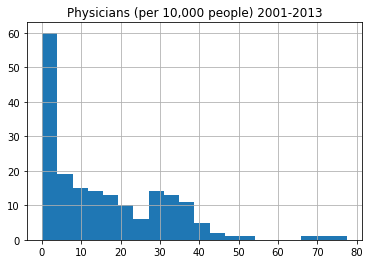

In [13]:
df.hist(column='Physicians (per 10,000 people) 2001-2013', bins = 20)

### random seed
Random seeds are also common to create reproducible results. <br>Fixing the seed is essential when we try to optimize a function that involves randomly generated number

---

### Fitting the data to a random distribution

In order to select the best numpy.random simulation the range of numpy random number generation statistical models was assessed. <br>
The mean and standard deviation ranges for each attribute was inputted to various statistical models below. <br>In order to select the best numpy.random simulation the range of numpy random number generation statistical models was assessed. <br>
---

In [14]:
# create a random seed to generate pseudo random numbers
import random
random.seed(10)

<br>

##### Physicians_per_100K
-----

[  9.35047221 -16.25208286  10.25481055  22.48372169  -5.58330297
 -11.65346031   7.11280783  33.65113217  39.24406748  31.77647947
  -6.53303365   9.34948179 -15.47750453  16.27205777  16.53199583
   8.4610595   -9.82240952  16.16415551  -8.14507121  33.84136805
  -8.45333958  11.59221664  10.34845562  22.05338921  22.38080223
  30.59118971  -0.83019982  12.61267209  22.79023941  26.8156118
  13.24473914  32.58991227  26.54748794  15.09449459   7.52394633
  45.08929049   4.49188755 -12.46378103   0.41801682   9.83384057
  36.77817405  11.65256651  26.53615913   3.56827319  23.18738644
  30.21829466  12.73705173 -11.09985603   1.40428571  26.55096222
  14.44142542  23.72357364  20.93087992 -11.41295342  14.79865941
  17.24033056  19.7790306   32.23333565  22.67259909 -10.26117145
  17.42383851  29.28303668  28.56068703  10.36144065  20.38415396
  -1.90632634   3.41114872 -12.79280763  12.12411405  -7.27338756
  -7.74413212   4.66484295  12.45234923  23.48724843  31.51080279
  21.692480

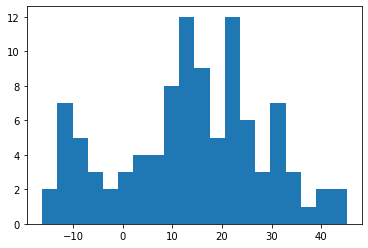

In [15]:
# create a random array with the mean and std. dev. of the original data [NORMAL]
Physicians_per_100K = np.random.normal(loc=15.94, scale=15.28, size=100)
plt.hist(Physicians_per_100K, bins = 20)
#plt.show()
print(Physicians_per_100K)

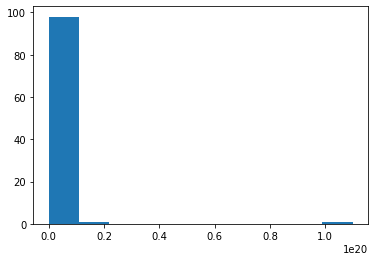

In [16]:
# create a random array with the mean (16) and stdev (15) of the original data [LOGNORMAL]
Physicians_per_100K = np.random.lognormal(16,15,100)
plt.hist(Physicians_per_100K, bins = 10);

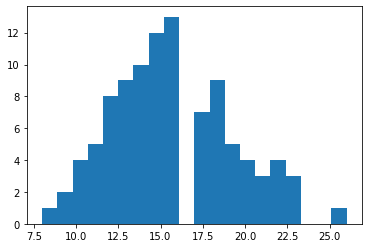

In [17]:
# create a random array with the mean (16) of the original data [POISSON]
Physicians_per_100K = np.random.poisson(16,100)
plt.hist(Physicians_per_100K, bins = 20);

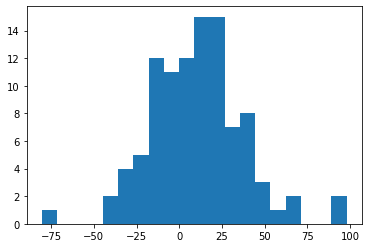

In [18]:
# create a random array with the mean (16) and stdev (15) of the original data [LOGISTIC]
Physicians_per_100K = np.random.logistic(16,15,100)
plt.hist(Physicians_per_100K, bins = 20);

##### Conclusion: Physicians_per_100K does not follow a range of statistical distributions

##### Alternate path for randomized data is to use the random.choice function in numpy
---

In [19]:
# use the random choice function in numpy to create a new array of 'randomized' data for simulation
df2 = np.random.choice((df['Physicians (per 10,000 people) 2001-2013']), size =100)

In [20]:
df2

array([ 0.1,  1.8,  0.4,  0.3,  1.6,  2.3, 43.1, 34.8,  9.3,  2.3,  1.7,
       26.9,  8.9, 19. , 34.2,  0.3, 31.5,  7.7,  0.8,  nan, 30. , 22. ,
        6.6, 43.1,  1. ,  0.5, 28.2, 28.4, 34.8, 40.9,  nan,  3.7, 11.8,
       24.5,  6.1, 23.9, 37.4,  4.5,  0.5, 42.4,  3.7, 11.1,  1.1, 25.6,
       17.1, 18.9,  1. ,  4.7, 28.4,  2.2, 14.7,  0.8,  1.8,  4.3, 38.1,
       32.6, 35.3,  0.5,  0.4, 16.9,  6.2, 10.2, 37.4,  0.5,  8.9, 34.2,
       11.5, 18.1,  0.6,  4.7,  nan,  7.8,  0.5,  0.2, 21.4, 31.6, 41.2,
        7.7,  0.5,  0.4,  nan, 67.2, 39.4, 35.3, 11.1, 37. ,  0.5,  nan,
       40.9,  2.3,  9.3,  3.4, 15.1, 22. , 32.6, 14.9,  4.5, 32.7, 22. ,
        0.4])

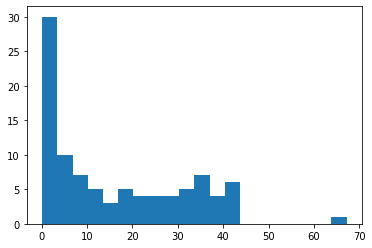

In [21]:
plt.hist(df2, bins = 20)
plt.show()

##### Conclusion:  random.choice function in numpy simulates the original dataset (shape/distribution)
---

In [22]:
# # create a random array with the mean and std. dev.of the original data
# Physicians_per_100K = np.random.normal(loc=15.787255, scale=14.877931, size=100)
# print(Physicians_per_100K)

<br>

##### Public health expenditure (% of GDP) 2013
---

array([[<AxesSubplot:title={'center':'Public health expenditure (% of GDP) 2013'}>]],
      dtype=object)

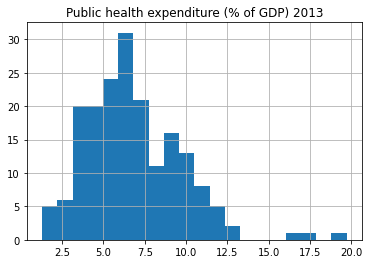

In [23]:
df.hist(column='Public health expenditure (% of GDP) 2013', bins = 20)

In [24]:
height = df['Public health expenditure (% of GDP) 2013'].values

In [25]:
# create a random array with the mean and std. dev. of the original data
Public_health_expenditure_percent_GDP = np.random.normal(loc=6.767980, scale=2.838771, size=1000)

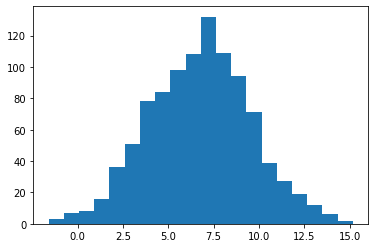

In [26]:
# check the shape of the data
plt.hist(Public_health_expenditure_percent_GDP, bins = 20)
plt.show()

##### Conclusion: Public_health_expenditure_percent_GDP follows a normal distribution
---

<br>

##### Life expectancy at age 60 (years) 2010/2015
---

array([[<AxesSubplot:title={'center':'Life expectancy at age 60 (years) 2010/2015'}>]],
      dtype=object)

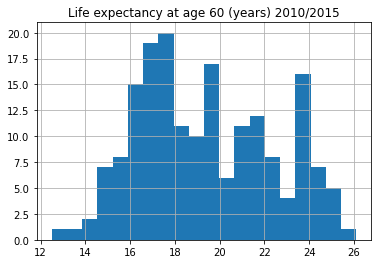

In [27]:
df.hist(column='Life expectancy at age 60 (years) 2010/2015', bins = 20)

In [28]:
# create a random array with the mean and std. dev. of the original data
Life_Expectancy_at_60 = np.random.normal(loc=19.355500, scale=2.938134, size=1000)

In [29]:
# check the correlation plt.hist(Life_Expectancy_at_60, bins = 20)
plt.show()

##### Conclusion: Life_Expectancy_at_60 follows a normal distribution
---


### Summary

The data for 'Physicians (per 10,000 people) 2001-2013' was a poor fit for the following random generators:
- normal
- lognormal
- logisitic
- poisson <br>

The decision was made to use the  **random choice** function in numpy to create a new array of 'randomized' data for simulation <br>

The data for 'Life expectancy at age 60 (years) 2010/2015', and 'Public health expenditure (% of GDP) 2013' was found to approximate to a normal distribution.<br>
The decision was made to use the **random.normal** function in numpy for random array genetration. <br> <br>
https://numpy.org/doc/1.16/reference/routines.random.html

---

#### 2b. Source suitable data not in current dataset (GDP)
#### 3b. Create a dataframe


In [30]:
df2= pd.read_csv('data/GDP per capita_new.csv')

In [31]:
df2

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,..,..,179.43,190.68,211.38,242.03,263.73,359.69,364.66,437.27,543.31,591.19,638.85,624.32,614.22,556.01
1,Albania,ALB,1126.68,1281.66,1425.12,1846.12,2373.58,2673.79,2972.74,3595.04,4370.54,4114.13,4094.35,4437.14,4247.63,4413.06,4578.63,3952.80
2,Algeria,DZA,1765.03,1740.61,1781.83,2103.38,2610.19,3113.09,3478.71,3950.51,4923.63,3883.27,4480.79,5455.68,5592.22,5499.59,5493.06,4177.89
3,Andorra,AND,21854.25,22970.51,25067.24,32272.85,37966.19,40064.22,42674.76,47804.85,48719.66,43504.22,40850.25,43334.81,38686.46,39540.72,41303.93,35770.78
4,Angola,AGO,556.84,527.33,872.49,982.96,1255.56,1902.42,2599.57,3122.00,4080.94,3122.78,3587.88,4615.47,5100.10,5254.88,5408.41,4166.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,VEN,4842.04,4986.68,3700.88,3272.62,4325.70,5504.98,6833.38,8454.47,11432.75,11765.10,13825.36,10955.54,12986.22,12457.77,16055.65,..
187,Vietnam,VNM,390.09,404.81,430.05,480.58,546.91,687.48,784.37,906.28,1149.42,1217.27,1317.89,1525.12,1735.15,1886.69,2030.28,2085.10
188,Yemen,YEM,554.45,550.36,579.85,620.38,709.97,832.84,921.42,1017.29,1229.25,1116.08,1334.78,1374.62,1446.54,1607.15,1674.00,1601.83
189,Zambia,ZMB,345.69,382.94,382.24,435.46,538.59,702.74,1047.92,1124.29,1394.00,1159.91,1489.46,1672.91,1763.07,1878.35,1762.43,1338.29


In [32]:
df2['2015']

0        556.01
1       3952.80
2       4177.89
3      35770.78
4       4166.98
         ...   
186          ..
187     2085.10
188     1601.83
189     1338.29
190     1445.07
Name: 2015, Length: 191, dtype: object

In [33]:
# the existing dataframe is an object and requires to be transformed to numeric (float) for processing
df2['2015'] = pd.to_numeric(df2['2015'],errors = 'coerce')

In [34]:
df2['2015']

0        556.01
1       3952.80
2       4177.89
3      35770.78
4       4166.98
         ...   
186         NaN
187     2085.10
188     1601.83
189     1338.29
190     1445.07
Name: 2015, Length: 191, dtype: float64

In [35]:
gdp_2015 = df2['2015']

---
#### 4 Clean-up the dataset
Dataframe manual clean-up:
"Ð" (5 iterations in df) = replaced with "-" manually using notepad++ before concatenating

Manual comparison of datasets identified there was misalignment of data for some countries/regions. <br> These were manually corrected/deleted using Notepad++ until both dastaset rows (country) matched.<br>

#### 5. Concatenate the relevant datasets (add GDP to existing dataset)


In [36]:
df=df.join(gdp_2015)

In [37]:
df

,Country,Country.1,Infants lacking immunization (% of one-year-olds) DTP 2013,Infants lacking immunization (% of one-year-olds) Measles 2013,"Mortality rates (per 1,000 live births) Infant 2013","Mortality rates (per 1,000 live births) Under-five 2013",Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013,"Adult mortality rate (per 1,000 people) Female 2013","Adult mortality rate (per 1,000 people) Male 2013","Deaths due to Malaria (per 100,000 people) 2012","Deaths due to Tuberculosis (per 100,000 people) 2012","HIV prevalence, adult (% ages 15-49) 2013",Life expectancy at age 60 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2013",Public health expenditure (% of GDP) 2013,2015
0,Afghanistan,Afghanistan,14.0,25.0,70.2,97.3,59.3,232.0,252.0,0.2,37.0,0.1,15.9,2.3,8.1,556.01
1,Albania,Albania,1.0,1.0,13.3,14.9,23.1,85.0,118.0,NaN,0.3,0.1,21.1,11.5,5.9,3952.80
2,Algeria,Algeria,1.0,5.0,21.6,25.2,15.9,121.0,164.0,0.0,15.0,0.1,17.9,12.1,6.6,4177.89
3,Andorra,Andorra,2.0,5.0,2.2,3.0,NaN,43.0,90.0,NaN,0.9,NaN,NaN,37.0,8.1,35770.78
4,Angola,Angola,3.0,9.0,101.6,167.4,29.2,322.0,372.0,100.9,42.0,2.4,15.7,1.7,3.8,4166.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,Venezuela (Bolivarian Republic of),10.0,15.0,12.9,14.9,13.4,88.0,198.0,2.2,2.4,0.6,21.1,19.4,3.4,NaN
187,Viet Nam,Viet Nam,17.0,2.0,19.0,23.8,23.3,69.0,189.0,0.2,20.0,0.4,22.4,11.6,6.0,2085.10
188,Yemen,Yemen,6.0,22.0,40.4,51.3,46.6,211.0,255.0,10.0,5.6,0.1,16.2,2.0,5.4,1601.83
189,Zambia,Zambia,14.0,20.0,55.8,87.4,45.8,303.0,356.0,79.2,28.0,12.5,17.0,0.7,5.0,1338.29


In [38]:
df.rename(columns = {"Life expectancy at age 60 (years) 2010/2015": "Life expectancy +60","Physicians (per 10,000 people) 2001-2013": "Physicians per 10K pop.","Public health expenditure (% of GDP) 2013": "Pub_Health Exp (%GDP)","2015": "GDP"}, 
          inplace = True)

---
#### 4. Clean-up the dataset (continued)


In [39]:
df

,Country,Country.1,Infants lacking immunization (% of one-year-olds) DTP 2013,Infants lacking immunization (% of one-year-olds) Measles 2013,"Mortality rates (per 1,000 live births) Infant 2013","Mortality rates (per 1,000 live births) Under-five 2013",Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013,"Adult mortality rate (per 1,000 people) Female 2013","Adult mortality rate (per 1,000 people) Male 2013","Deaths due to Malaria (per 100,000 people) 2012","Deaths due to Tuberculosis (per 100,000 people) 2012","HIV prevalence, adult (% ages 15-49) 2013",Life expectancy +60,Physicians per 10K pop.,Pub_Health Exp (%GDP),GDP
0,Afghanistan,Afghanistan,14.0,25.0,70.2,97.3,59.3,232.0,252.0,0.2,37.0,0.1,15.9,2.3,8.1,556.01
1,Albania,Albania,1.0,1.0,13.3,14.9,23.1,85.0,118.0,NaN,0.3,0.1,21.1,11.5,5.9,3952.80
2,Algeria,Algeria,1.0,5.0,21.6,25.2,15.9,121.0,164.0,0.0,15.0,0.1,17.9,12.1,6.6,4177.89
3,Andorra,Andorra,2.0,5.0,2.2,3.0,NaN,43.0,90.0,NaN,0.9,NaN,NaN,37.0,8.1,35770.78
4,Angola,Angola,3.0,9.0,101.6,167.4,29.2,322.0,372.0,100.9,42.0,2.4,15.7,1.7,3.8,4166.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,Venezuela (Bolivarian Republic of),10.0,15.0,12.9,14.9,13.4,88.0,198.0,2.2,2.4,0.6,21.1,19.4,3.4,NaN
187,Viet Nam,Viet Nam,17.0,2.0,19.0,23.8,23.3,69.0,189.0,0.2,20.0,0.4,22.4,11.6,6.0,2085.10
188,Yemen,Yemen,6.0,22.0,40.4,51.3,46.6,211.0,255.0,10.0,5.6,0.1,16.2,2.0,5.4,1601.83
189,Zambia,Zambia,14.0,20.0,55.8,87.4,45.8,303.0,356.0,79.2,28.0,12.5,17.0,0.7,5.0,1338.29


In [40]:
df3 = df[['Pub_Health Exp (%GDP)','Physicians per 10K pop.','GDP','Life expectancy +60']]

In [41]:
# new dataframe contains the 4 variables of interest
# the 'country' column was purposefully not carried forward
df3

,Pub_Health Exp (%GDP),Physicians per 10K pop.,GDP,Life expectancy +60
0,8.1,2.3,556.01,15.9
1,5.9,11.5,3952.80,21.1
2,6.6,12.1,4177.89,17.9
3,8.1,37.0,35770.78,NaN
4,3.8,1.7,4166.98,15.7
...,...,...,...,...
186,3.4,19.4,NaN,21.1
187,6.0,11.6,2085.10,22.4
188,5.4,2.0,1601.83,16.2
189,5.0,0.7,1338.29,17.0


In [42]:
#check the new dataframe properites
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pub_Health Exp (%GDP)    185 non-null    float64
 1   Physicians per 10K pop.  187 non-null    float64
 2   GDP                      188 non-null    float64
 3   Life expectancy +60      181 non-null    float64
dtypes: float64(4)
memory usage: 11.5 KB


In [43]:
df3.describe().round()

,Pub_Health Exp (%GDP),Physicians per 10K pop.,GDP,Life expectancy +60
count,185.0,187.0,188.0,181.0
mean,7.0,16.0,14670.0,19.0
std,3.0,15.0,23736.0,3.0
min,1.0,0.0,293.0,12.0
25%,5.0,2.0,1923.0,17.0
50%,6.0,12.0,5539.0,19.0
75%,9.0,28.0,16109.0,22.0
max,20.0,77.0,167313.0,26.0


<br>

#### Now that the 4 attributes of interest are in one dataframe the next step is to plot the two sets of data: <br>

1. original data
2. simulated data
---


#### 6. Check for correlations


The sns pairplot plots the various attributes visually in a correlation matrix.

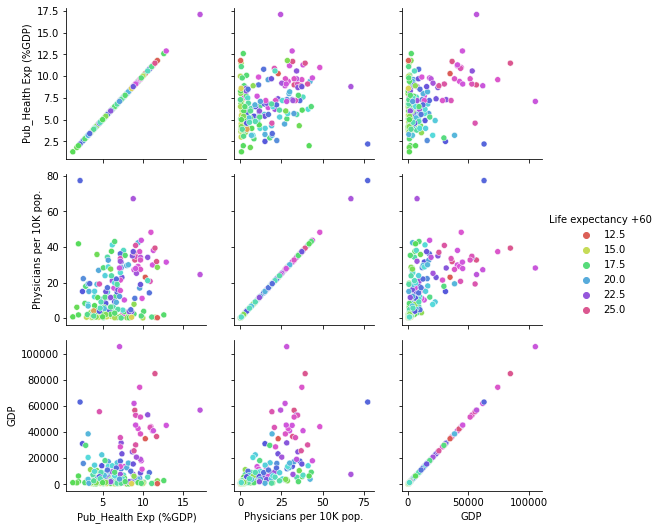

In [44]:
x = sns.PairGrid(df3, hue='Life expectancy +60', palette='hls').map(sns.scatterplot)
x.add_legend()
plt.show()

The following can be ascertained from the above plot:

- The strongest correlation is between 'GDP' vs 'Physicians per 10K' affirming country wealth has a correlation to # of physicians
- There is weak positive correlation between 'GDP' and 'Pub_Health Exp (%GDP)' showing difference in public spending policy between countries
- 'Life expectancy at 60' is directly correlated to 'GDP' with a weaker correlation to 'Physicians per 100K' and 'Pub_Health Exp (%GDP)'
- The weakest correlation is between 'Physicians per 10K' and 'Pub_Health Exp (%GDP)'

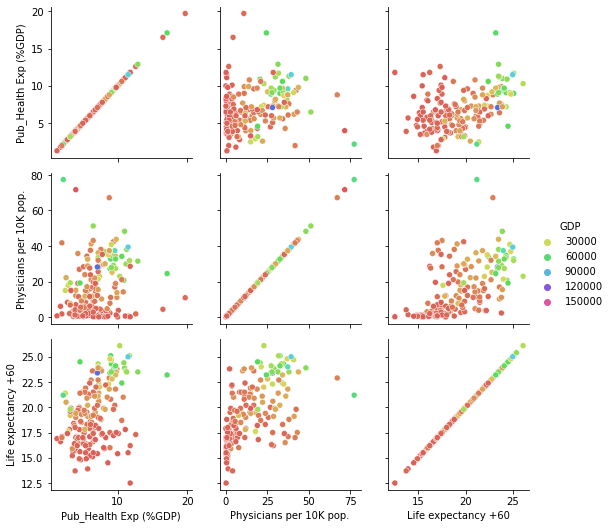

In [45]:
x = sns.PairGrid(df3, hue='GDP', palette='hls').map(sns.scatterplot)
x.add_legend()
plt.show()

The following can be ascertained from the above plot:

- There is a positive correlation between 'Life expectancy at 60' and 'Physicians per 10K'
- There is a weaker positive correlation between 'Life expectancy at 60' and 'Pub_Health Exp (%GDP)'
- There is a weak relationship between 'Physicians per 10K' and 'Life expectancy at 60' <br>
with perhaps two separate populations present one for low numbers of physicians


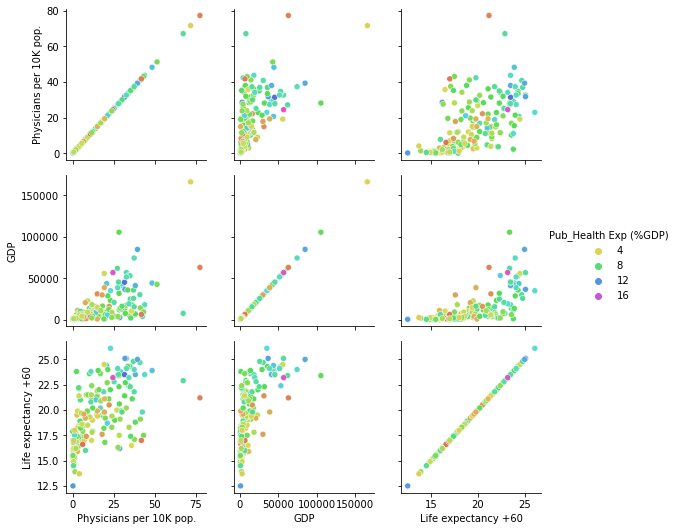

In [46]:
x = sns.PairGrid(df3, hue='Pub_Health Exp (%GDP)', palette='hls').map(sns.scatterplot)
x.add_legend()
plt.show()

The following can be ascertained from the above plot:

- There is a positive correlation between'Physicians per 10K'and 'Life expectancy at 60' similar to seen in the above 'GDP' pairplot 
- Based on the hue:  'Pub_Health Exp (%GDP)' has an effect on life expectancy
- There is weak/no correlation between 'GDP' and 'Physicians per 10K' and perhaps surprisingly 'GDP' and 'Life expectancy at 60


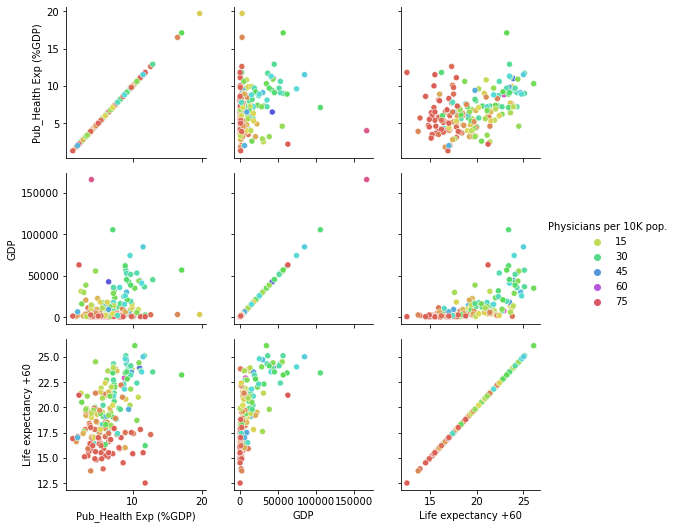

In [47]:
x = sns.PairGrid(df3, hue='Physicians per 10K pop.', palette='hls').map(sns.scatterplot)
x.add_legend()
plt.show()

The following can be ascertained from the above plot:

- There is a positive correlation between'Physicians per 10K'and 'Life expectancy at 60' similar to seen in the above 'GDP' pairplot 
- Based on the hue 'Physicians per 10K' is inversely correlated with 'Life expectancy at 60'.  
This is surprising and shows additional doctors do not lead to better health outcomes. Other hidden factors may need to be included.


---
#### 7. Identify best data distribution

The four attributes to be simulated are: 'GDP' 'Physicians per 10K' 'Pub_Health Exp (%GDP)' 'Life expectancy at 60'. <br>
Based on the assessment of the datasets and use of different numpy.random distributions available:

For **Public Health expenditure as a percentage of GDP** and **Life Expectancy** the data whne plotted (histogram) followed a standard normal distribution. <br>Thus a normal distribution is an acceptable model of these variables.  Thus the mean and standard deviation were used to draw random samples from a normal (Gaussian) distribution for simulation purposes. <br><br>
For **Physicians per 10K** when plotted, the distribution does not follow a normal distribution.  <br> Attempts to fit the data to other numpy available statistical distributions were not successful. <br>The *random choice* function in *NUMPY* generates a random sample from a given 1-D array.  <br> This allows generation of a dataset from parent data thast reflects the distribution but is a randomized version for simulation purposes. <br><br>
For **GDP data**, the mean and standard deviation were used to draw random samples from a normal (Gaussian) distribution for simulation purposes.  <br> However these returned both positive and negative numbers.  Instead the *random choice* function in *NUMPY* was again used to generate a random sample from the original master data. <br>

---

 


#### 8. Generate simulated data

In [48]:
# create a random array with the mean and std. dev. of the original data
Pub_Health_Exp_percentGDP_sim = np.random.normal(loc=7, scale=3.0, size=100)
print(Pub_Health_Exp_percentGDP_sim)

[11.812051   13.30722314  2.10221784  5.75160627  6.79632415  9.99011127
 12.86907882  5.50037641 12.35219395  7.43384797  2.32357252  6.98601734
  9.08353151  7.71469587  8.26460188  9.87343762  4.70225833  7.50016856
  9.89326418  5.75474692  3.36250586  8.8652391   2.18551566  9.64749284
  0.4516198   8.5710002   7.50086248  6.63926888  8.53226471  7.66118733
 11.41132599  6.97508161  5.8762842   9.26360773  7.52278538  5.84119652
  4.51018625  4.08209954  4.9461789   8.95893671  3.57580709  9.24113969
  2.818692    7.75918731 10.15702094 12.13052106  4.01336933  4.95105938
  5.67920406  6.5887502   6.39351723 10.00630772  7.44011767  6.72593022
  3.00262021  7.70619224  7.65302864 11.1701196   8.49143427 11.36567945
 12.36967551  8.97967287  6.75021125  8.5732768  11.26458074 14.81852713
  2.71240202 10.43320729  7.64881968  7.21323833  7.0880038  13.54178718
  8.58043412 11.81763246  5.26254923  9.39643642  2.24296965  8.9438692
  8.88729386  9.05667717  7.5157384   6.75395222  6.

In [49]:
# create a random array from the original dataset and numpy.random.choice of the original data
Physicians_per_10K_pop_sim = np.random.choice((df3['Physicians per 10K pop.']), size =100)
print(Physicians_per_10K_pop_sim)

[11.5 11.7 31.5 34.3  0.7 31.6 37.  28.8 37.4 27.6  0.4  3.   1.8  2.1
 35.  15.5  0.2  8.3  1.1 38.1 15.   0.8 35.3  nan 40.9 36.2 29.9  0.1
  4.9  0.7 11.1 17.9 28.8 17.9 37.6 32.7  7.   1.5  0.7 38.1 29.6 13.8
  2.  28.3  2.  13.8 29.9  4.1  0.8 31.8  6.1 18.1  3.6 34.2 11.5  2.1
  1.   2.3  5.6 16.9 28.2 27.4  1.8  0.7 22.9  8.9  0.6  6.1  0.7 14.7
  1.  28.6  1.   0.5 35.   0.5 32.6  0.8  4.1 24.5  0.5 34.8  3.7 28.3
 15.1  0.4 43.1 32.  27.6  8.3 12.2 19.4 42.4 28.2  1.5 22.  22.   4.4
 21.4  7.7]


In [50]:
# create a random array with the mean and std. dev. of the original data
Life_expectancy_plus60_sim = np.random.normal(loc=19, scale=3, size=100)
print(Life_expectancy_plus60_sim)

[25.62469576 19.21274085 13.84634788 21.91175061 21.63641675 24.87767069
 17.45335868 15.64656949 19.99128188 16.92499197 19.00572632 20.17041793
 18.10037459 18.93826498 15.46491361 25.47416513 19.83588471 22.86991395
 22.32654576 19.27141366 18.8027605  19.60010598 16.81554461 21.06875584
 23.04429359 17.96955554 16.93233152 20.65519664 18.67480119 20.15086895
 12.50890503 18.50571448 20.91267537 15.43871542 13.66636233 18.46527731
 21.42529571 12.96242085 16.95410925 16.89435858 19.89206872 20.48108851
 20.39897596 17.36653281 18.94449428 17.25350764 16.42366484 17.46352233
 19.13726326 15.99814373 21.91078654 16.17384967 19.90017907 18.09189846
 15.17896088 18.74910978 20.25014125 21.99156302 18.68406985 19.40557793
 15.49091381 21.11878093 23.66212399 19.75172835 21.99698478 19.94362855
 21.18421286 24.8079961  23.96285052 14.01675134 12.05633119 18.67467528
 18.09023216 19.31973369 19.07256263 18.20206248 16.6959927  16.47980408
 17.15495799 18.79524105 21.14161331 21.12112309 22

In [51]:
# create a random array from the original dataset and numpy.random.choice of the original data
# use of numpy.random.normal using the the mean and std. dev. of the original data gave negative values
# therefore the function numpy,random.choice was preferred
GDP_sim2 = np.random.choice((df3['GDP']), size =100)
print(GDP_sim2)

[11933.38  4729.69  2679.35  7074.68 35770.78  3705.58 15613.75  1242.59
 31776.06 43596.14      nan  9313.01  7663.92  1338.29 15613.75  5967.05
  3607.29 31164.04  1338.29  8969.15   978.4    556.01   589.86  2695.67
  4014.19  9955.24 31164.04 16033.46 42784.7   2687.48   293.46  2085.1
  1656.91  9616.65 13780.91 25732.02 42662.9  23408.34  1248.45 18214.46
  4729.69 36638.18  1774.07  3331.7  55646.62   916.36  7663.92  1076.8
  3199.89  7597.29  3952.8   2906.62      nan  2687.48  2085.1  40991.81
 16033.46 16033.46  8016.43  1524.07  2732.46  1121.08 55646.62   377.42
  4014.19 13630.3   9955.24  3843.78 14285.33   603.4   2447.54  9033.41
  6432.69  3197.77  7384.7   2732.46  4770.23 45175.23   588.23  3843.78
   847.27  3562.93 35770.78  2753.97   380.6   3562.93   847.27  6259.84
  2753.97  1774.07 25732.02  4014.19  2695.67 61987.55  1386.85  9033.41
  7597.29  2167.12      nan  4336.24]


In [52]:
# remove the standard scientific notation for arrays for display purposes
np.set_printoptions(suppress=True)

---
#### 9. Merge simulated data into one dataframe

In [53]:
Col1= Pub_Health_Exp_percentGDP_sim
Col2= Physicians_per_10K_pop_sim
Col3= GDP_sim2
Col4= Life_expectancy_plus60_sim

simulation_df= np.stack([Col1,Col2,Col3,Col4], axis=1)
simulation_df = pd.DataFrame(simulation_df, columns = ['%GDP spend on Health','Phys. per 10K_sim','GDP_sim','Life_Exp_sim'])

print(simulation_df)
print(type(simulation_df))

    %GDP spend on Health  Phys. per 10K_sim   GDP_sim  Life_Exp_sim
0              11.812051               11.5  11933.38     25.624696
1              13.307223               11.7   4729.69     19.212741
2               2.102218               31.5   2679.35     13.846348
3               5.751606               34.3   7074.68     21.911751
4               6.796324                0.7  35770.78     21.636417
..                   ...                ...       ...           ...
95              9.689613               22.0   9033.41     21.587340
96              5.097398               22.0   7597.29     20.986983
97              8.385339                4.4   2167.12     17.474693
98             12.642035               21.4       NaN     14.829371
99              7.382639                7.7   4336.24     19.603445

[100 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


---
#### 10. Plot data (simulated data)

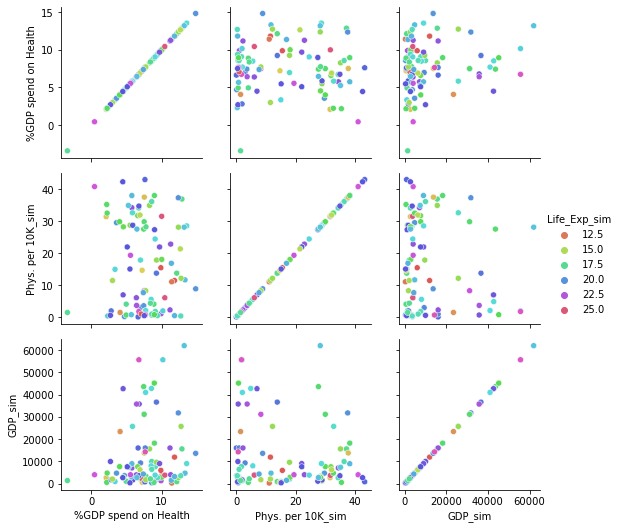

In [54]:
y = sns.PairGrid(simulation_df, hue='Life_Exp_sim', palette='hls').map(sns.scatterplot)
y.add_legend()
plt.show()

The following can be ascertained from the above plot:

- For the original dataset there were weak correlations between the attributes as seen in the pairplot
- However due to the additional randomization the correlations seen with the original dataset have been randomized
- In summary simple randomization of each data separately has weakened the previously seen correlations with the parent data
- To ensure simulated data reflects the same correlations to the original data requires:
1.  a strong and predictable correlation between each attribute i.e. y =mx +C
2. This function needs to be incorporated in the transformation of the data from parent to simulated dataset

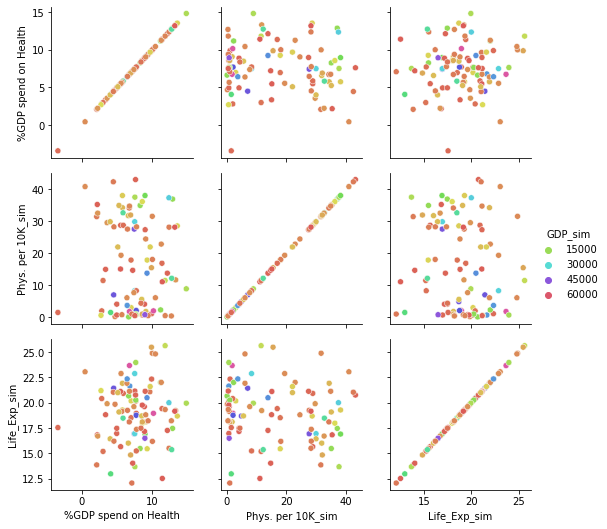

In [55]:
y = sns.PairGrid(simulation_df, hue='GDP_sim', palette='hls').map(sns.scatterplot)
y.add_legend()
plt.show()

The following can be ascertained from the above plot:

- For the original dataset there were weak correlations between the attributes as seen in the pairplot
- However due to the additional randomization the correlations seen with the original dataset have been randomized
- In summary simple randomization of each data separately has weakened the previously seen correlations with the parent data.


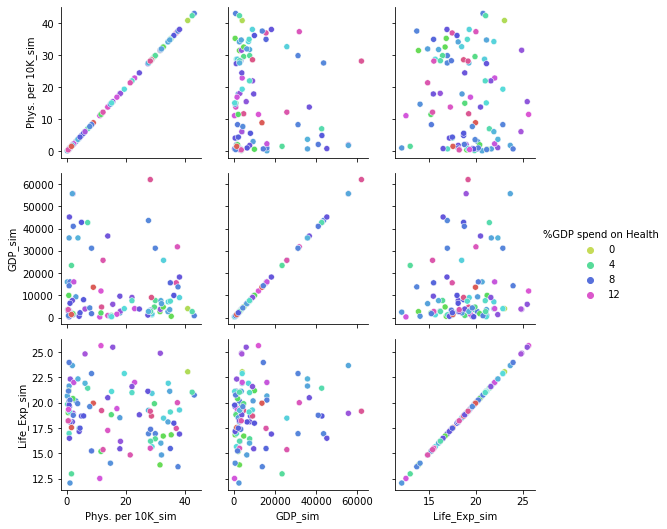

In [56]:
y = sns.PairGrid(simulation_df, hue='%GDP spend on Health', palette='hls').map(sns.scatterplot)
y.add_legend()
plt.show()

The following can be ascertained from the above plot:

- For the original dataset there were weak correlations between the attributes as seen in the pairplot
- However due to the additional randomization the correlations seen with the original dataset have been randomized
- In summary simple randomization of each data separately has weakened the previously seen correlations with the parent data.


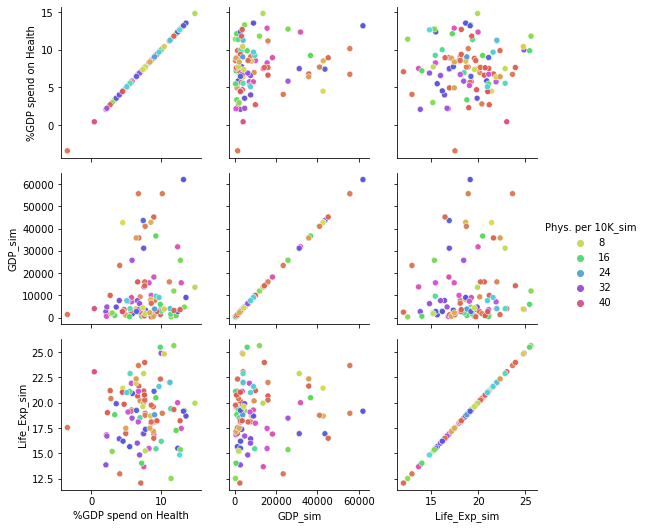

In [57]:
y = sns.PairGrid(simulation_df, hue='Phys. per 10K_sim', palette='hls').map(sns.scatterplot)
y.add_legend()
plt.show()

The following can be ascertained from the above plot:

- For the original dataset there were weak correlations between the attributes as seen in the pairplot
- However due to the additional randomization the correlations seen with the original dataset have been randomized
- In summary simple randomization of each data separately has weakened the previously seen correlations with the parent data.


---
#### 11. Summary

- For the original dataset there were weak correlations between the attributes as seen in the pairplot
- However due to the additional randomization the correlations seen with the original dataset have been randomized
- In summary simple randomization of each data separately has weakened the previously seen correlations with the parent data.
- To ensure simulated data reflects the same correlations to the original data requires:
1.  a strong and predictable correlation between each attribute i.e. y =mx +C
2. This function needs to be incorporated in the transformation of the data from parent to simulated dataset

In [58]:
#headers =  ['Pub_Health Exp (%GDP)', 'Physicians_per_10K_pop_sim', 'GDP_sim', 'Life_expectancy_plus60_sim']
#simulation_df.columns = headers

In [59]:
#arrays=[
    #np.array([Pub_Health_Exp_percentGDP_sim]),
    #np.array([Physicians_per_10K_pop_sim]),
    #np.array([GDP_sim])
#]

#for array in arrays:
    #simulated_data = np.concatenate([simulated_data, array])

# Print results
#print('sample', sample)
#print('length', len(sample))

#### References

Original CSV file: https://data.world/hdro/d41b5824-e40e-4fd6-9c8f-900eb2616f3c/workspace/project-summary?agentid=hdro&datasetid=d41b5824-e40e-4fd6-9c8f-900eb2616f3c

GDP & Life Expectancy: <br>
https://databank.worldbank.org/home.aspx <br>
https://databank.worldbank.org/databases/health


Source: https://data.humdata.org/dataset/health-outcomes
Last updated at https://data.humdata.org/organization/undp-human-development-reports-office : 2021-09-23

License -
Creative Commons Attribution for Intergovernmental Organisations


The demand for good-quality statistical data continues to increase. Timely and reliable statistics are key inputs to the broad development strategy. Improvements in the quality and quantity of data on all aspects of development are essential if we are to achieve the goal of a world without poverty.

Good data are needed to set baselines, identify effective public and private actions, set goals and targets, monitor progress and evaluate impacts. They are also an essential tool of good government, providing means for people to assess what governments do and helping them to participate directly in the development process.

At the World Bank, the Development Data Group coordinates statistical and data work and maintains a number of macro, financial and sector databases. Working closely with the Bank’s regions and Global Practices, the group is guided by professional standards in the collection, compilation and dissemination of data to ensure that all data users can have confidence in the quality and integrity of the data produced.

Much of the data comes from the statistical systems of member countries, and the quality of global data depends on how well these national systems perform. The World Bank works to help developing countries improve the capacity, efficiency and effectiveness of national statistical systems. Without better and more comprehensive national data, it is impossible to develop effective policies, monitor the implementation of poverty reduction strategies, or monitor progress towards global goals.

Measurement of Development Progress
World Bank databases are essential tools for supporting critical management decisions and providing key statistical information for Bank operational activities. The application of internationally accepted standards and norms results in a consistent, reliable source of information.

Global Statistical Strategy
To be of use, statistics must be both reliable and relevant. They need to be compiled correctly, following standard practices and methodology. They must also meet the needs of users and answer the questions posed by policymakers.

Developing countries face a number of problems in providing statistics that meet these criteria. They often find themselves caught in a vicious cycle—under-investment in national statistical systems constrains activities and results in data of poor quality, which policymakers are unwilling to rely on. This lack of demand for the data leads to fewer resources being made available for their production and quality control. The World Bank is committed to helping developing countries break out of this cycle. Our work includes investments in statistical activities, creating and implementing standards and frameworks for data collection, analysis and dissemination, strengthening the international statistical system, and compiling global data sets.

There is also much to be done in raising awareness of the value of statistics among governments, decision makers and other users. As advocates for statistics, we work in close partnership with developing countries and our partners in the international community.

A priority of the World Bank’s efforts to improve the statistical infrastructure of developing countries is the preparation of national strategies for the development of statistics as recommended in the Marrakech Action Plan for Statistics. These country-driven plans look at the needs of the whole statistical system and provide the basis for coordinated and prioritized donor assistance. Other components of the World Bank’s statistical capacity building program include:

Improving Statistical Capacity
Trust Fund for Statistical Capacity Building
International Comparison Program
The International System
The World Bank works closely with the international statistical community including the agencies of the United Nations (UN), the Organisation for Economic Co-Operation and Development (OECD), the International Monetary Fund (IMF), the regional development banks, and donors by:

Participating in the UN Statistical Commission and other statistical forums to develop appropriate frameworks, guidance and standards of good practice for statistics
Building consensus and defining internationally agreed indicators, such as the indicators for the Millennium Development Goals
Establishing data exchange processes and methods
Assembling, analyzing and disseminating data online and in print
In addition to compiling international data sets, which are generally based on data generated by national statistical systems, the World Bank supports a number of programs to collect transnational data. These are data that can only be collected by a globally coordinated program. They include:

Marrakech Action Plan for Statistics
PARIS21
Training and Client Services
Providing training courses on new and regular data practices and tools is an important element of the Bank’s data business. These courses are free of charge and attended by Bank staff and some participants from visiting client countries.

The “customer support” for the growing number of users of data and data tools includes responding to large volumes of queries and requests from inside and outside the Bank; increasing the accessibility and availability of data knowledge; providing technical and knowledge support to internal and external clients; and responding to client needs for the presentation and understanding of the data.

Publications
The World Bank produces an array of data publications in various formats (print and electronic) that cover a wide range of development issues. These publications reflect the scope of the data work and the wide range of user interests. They also make the data more available and accessible, especially through the use of maps, charts and graphs.\u2028

For general information about data, publications and time-series, contact the World Bank Development Data Group:

Email: data@worldbank.org
Phone: (202) 473-7824 or +1 (800) 590-1906